## Healthcare for All

The idea here is to recap data cleaning and feature engineering, while simulating a job interview case study.

You have been assigned a task to solve the case study related to HealthCare for All dataset, where you will deliver an end-to-end Exploratory Data Analysis and Machine Learning process.

The plan for the next two classes is to apply the data cleaning and feature engineering techniques we have learned so far.

We will be working with this same notebook/case study throughout the whole unit, so take your time and make it nice and organized.

Hints:
* Read the case study and reason about the problem as you would if this was a job interview case study;
* Read the columns descriptions;
* Choose the appropriate columns (we are working with a 450+ columns dataset);
* Deal with all the nulls;
* Separated categorical and numericals;
* Make your notebook comprehensible and easy to navigate;
* Watch out, you might exclude columns that I might want to use for examples, so make sure you make it easy to include them back in;
* Train a basic model to be our benchmark;

Don't worry about the labs, you will use them to guide/inspire you through this activity, but labs 7.01 and 7.02 are not priority (you will be doing your own work here and submitting this instead).

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [29]:
data = pd.read_csv('learningSet.csv')
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [30]:
data.shape

(95412, 481)

In [31]:
data.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,42558.000000,42498.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,51589.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412

In [32]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
RDATE_5,99.990567
RAMNT_5,99.990567
RDATE_3,99.746363
RAMNT_3,99.746363
RDATE_4,99.705488
RAMNT_4,99.705488
RAMNT_6,99.186685
RDATE_6,99.186685
RAMNT_15,92.388798
RDATE_15,92.388798


In [33]:
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
model_list = [LinearRegression(), KNeighborsRegressor(n_neighbors=3, n_jobs=10), KNeighborsRegressor(n_neighbors=5, n_jobs=10), KNeighborsRegressor(n_neighbors=7, n_jobs=10), MLPRegressor(hidden_layer_sizes=(100,), alpha=0.0001, learning_rate_init=0.001, random_state=42), RandomForestRegressor(), XGBRegressor(n_estimators = 1000), XGBRegressor(), XGBRegressor(n_estimators=1000, learning_rate=0.05)]


def funky_function4_1_4(data, model_list):
    X = pd.get_dummies(data.drop('TARGET_D', axis=1))
    y = data['TARGET_D']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train, X_test = (scaler.transform(X_train), scaler.transform(X_test))
    results = {}
    results_mae = {}
    results_mse = {}
    for model in model_list:
        model.fit(X_train, y_train)
        results[model] = model.score(X_test, y_test)
        print(model, 'R2 score:', model.score(X_test, y_test))
        y_pred = model.predict(X_test)
        results2 = mean_absolute_error(y_test, y_pred)
        results3 = mean_squared_error(y_test, y_pred, squared=False)
        print('Mean Absolute Error:', results2)
        print('Mean Squared Error:', results3)
        results_mae[model] = results2
        results_mse[model] = results3
        plt.figure(figsize=(10,8))
        sns.regplot(x=y_pred, y=y_test, line_kws={"color": "orange"})
        plt.xlabel('Actual Values ')
        plt.ylabel('Predictions ')
        plt.title('Linear Model Predictions vs Actual')
        plt.show()
    final_result_r2 = max(results.values())
    final_result_mae = min(results_mae.values())
    final_result_mse = min(results_mse.values())
    print("--------------------------------------------------------------------------------------------------------")
    print('TAA DAAA!! AND THE WINNER IIIISSSSS:')
    print("--------------------------------------------------------------------------------------------------------")
    best_mae_model = min(results_mae, key=results_mae.get)
    best_r2_model = max(results, key=results.get)
    best_mse_model = min(results_mse, key=results_mse.get)
    print('Best R2:', best_r2_model, final_result_r2)
    print('Best Mean Absolute Error:', best_mae_model, final_result_mae)
    print('Best Mean Squared Error:', best_mse_model, final_result_mse)
    plt.figure(figsize=(10,8))
    sns.regplot(x=best_r2_model.predict(X_test), y=y_test, line_kws={"color": "orange"})
    plt.xlabel('Actual Values ')
    plt.ylabel('Predictions ')
    plt.title('Linear Model R2 Predictions vs Actual')
    plt.show()
    plt.figure(figsize=(10,8))
    sns.regplot(x=best_mae_model.predict(X_test), y=y_test, line_kws={"color": "green"})
    plt.xlabel('Actual Values ')
    plt.ylabel('Predictions ')
    plt.title('Linear Model MAE Predictions vs Actual')
    plt.show()
    plt.figure(figsize=(10,8))
    sns.regplot(x=best_mse_model.predict(X_test), y=y_test, line_kws={"color": "yellow"})
    plt.xlabel('Actual Values ')
    plt.ylabel('Predictions ')
    plt.title('Linear Model MSE Predictions vs Actual')
    plt.show()
    return best_mae_model, best_mse_model, best_r2_model

In [34]:
#data = data.replace(np.nan, 0)

In [35]:
data.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,42558.000000,42498.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,42558.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,51589.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.00000,95412.000000,95412.000000,95412.000000,95412

def func3(data1, model_list):
    X = data.drop(['TARGET_D'], axis=1)
    X = pd.get_dummies(X)
    y = data['TARGET_D']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    results = []
    for model in model_list:
        model.fit(X_train, y_train)
        results.append(model.score(X_test, y_test))
        y_pred = model.predict(X_test)
        results2 = mean_absolute_error(y_test, y_pred)
        results3 = mean_squared_error(y_test, y_pred, squared=False)
    final_result = results.index(max(results))
    print(max(results))
    print('MAE:', results2)
    print('MSE:', results3)
    return model_list[final_result]


func3(data, model_list)

In [36]:
data['AGE'].value_counts()

50.0    1930
76.0    1885
72.0    1813
68.0    1809
74.0    1801
70.0    1740
78.0    1734
48.0    1730
66.0    1622
54.0    1621
46.0    1585
52.0    1567
56.0    1566
80.0    1560
58.0    1525
42.0    1496
62.0    1471
44.0    1457
82.0    1431
60.0    1427
64.0    1333
40.0    1312
77.0    1275
73.0    1226
75.0    1210
84.0    1198
51.0    1187
79.0    1114
71.0    1110
69.0    1098
38.0    1094
67.0    1092
49.0    1022
81.0    1013
55.0    1012
36.0    1004
83.0     956
57.0     942
47.0     938
59.0     933
63.0     925
86.0     906
61.0     878
45.0     865
53.0     861
65.0     856
43.0     822
34.0     818
41.0     771
85.0     757
88.0     731
39.0     660
32.0     596
37.0     578
87.0     567
90.0     567
35.0     477
30.0     452
89.0     427
92.0     408
28.0     355
91.0     352
33.0     309
94.0     265
26.0     248
96.0     213
31.0     210
93.0     184
29.0     160
95.0     140
24.0     131
27.0     104
97.0      69
22.0      52
98.0      41
25.0      35
23.0      32

In [37]:
nulls_age = data['AGE'].isna().sum()*100/len(data['AGE'])
nulls_age

24.802959795413575

In [38]:
data['AGE'] = data['AGE'].fillna(round(np.mean(data['AGE'])))

In [39]:
data1 = data.copy()

In [12]:
data = data[['TARGET_D', 'LASTGIFT', 'AVGGIFT', 'MAXRAMNT', 'MINRAMNT', 'MAXRDATE',
       'ODATEDW', 'FISTDATE', 'RAMNTALL', 'IC5', 'HV2', 'IC4', 'HV1', 'IC2',
       'IC3', 'EC8', 'IC21', 'IC1', 'IC12', 'IC20', 'IC11', 'HVP1', 'HVP6',
       'HV3', 'HVP4', 'HV4', 'HVP3', 'RP2', 'EC7', 'HVP2', 'RP1', 'MHUC1',
       'OCC1', 'RP3', 'HVP5', 'AGE']]

In [13]:
data.describe()

,TARGET_D,LASTGIFT,AVGGIFT,MAXRAMNT,MINRAMNT,MAXRDATE,ODATEDW,FISTDATE,RAMNTALL,IC5,HV2,IC4,HV1,IC2,IC3,EC8,IC21,IC1,IC12,IC20,IC11,HVP1,HVP6,HV3,HVP4,HV4,HVP3,RP2,EC7,HVP2,RP1,MHUC1,OCC1,RP3,HVP5,AGE
count,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000
mean,0.793073,17.313127,13.347786,19.999790,7.933656,9441.860426,9141.363256,9135.651648,104.489351,15722.738230,1133.031086,430.792961,1061.838238,387.027114,387.418302,7.366044,2.602618,340.056387,2.211892,6.584413,5.586247,13.587599,6.446348,4.224249,51.174381,3.875886,35.105228,42.366379,14.069824,21.049449,29.141104,8.112837,14.122762,59.681979,73.906794,61.707972
std,4.429725,13.956630,10.769997,25.067746,8.784231,172.870471,343.454752,320.394019,118.580367,8563.646776,947.384618,171.643319,941.765892,173.614627,161.270738,7.057123,3.907194,162.883283,3.346289,6.666176,5.835321,26.623057,18.064895,2.307938,36.745060,2.244389,36.644715,34.930840,9.729814,31.897623,32.195145,3.530980,8.231474,32.893874,29.596154,14.451513
min,0.000000,0.000000,1.285714,5.000000,0.000000,7510.000000,8306.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,10.000000,8.384615,14.000000,3.000000,9409.000000,8801.000000,8810.000000,40.000000,10788.000000,555.000000,314.000000,513.000000,274.000000,277.000000,3.000000,0.000000,231.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,15.000000,2.000000,3.000000,7.000000,7.000000,0.000000,2.000000,6.000000,8.000000,29.000000,52.000000,52.000000
50%,0.000000,15.000000,11.636364,17.000000,5.000000,9506.000000,9201.000000,9201.000000,78.000000,13727.500000,803.000000,397.000000,737.000000,355.000000,354.000000,5.000000,1.000000,310.000000,1.000000,4.000000,4.000000,1.000000,0.000000,4.000000,48.000000,3.000000,17.000000,36.000000,12.000000,3.000000,14.000000,8.000000,13.000000,68.000000,89.000000,62.000000
75%,0.000000,20.000000,15.477955,23.000000,10.000000,9512.000000,9501.000000,9409.000000,131.000000,18169.000000,1328.250000,514.000000,1213.000000,465.000000,466.000000,10.000000,3.000000,414.000000,3.000000,10.000000,8.000000,9.000000,2.000000,5.000000,92.000000,5.000000,70.000000,77.000000,20.000000,28.000000,54.000000,9.000000,18.000000,91.000000,99.000000,71.000000
max,200.000000,1000.000000,1000.000000,5000.000000,1000.000000,9702.000000,9701.000000,9603.000000,9485.000000,174523.000000,6000.000000,1500.000000,6000.000000,1500.000000,1500.000000,99.000000,50.000000,1500.000000,50.000000,99.000000,99.000000,99.000000,99.000000,13.000000,99.000000,13.000000,99.000000,99.000000,99.000000,99.000000,99.000000,21.000000,99.000000,99.000000,99.000000,98.000000


In [14]:
nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
TARGET_D,0.0
LASTGIFT,0.0
IC11,0.0
HVP1,0.0
HVP6,0.0
HV3,0.0
HVP4,0.0
HV4,0.0
HVP3,0.0
RP2,0.0


In [15]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error as MSE
#scaler = StandardScaler()
#test_df = df4.loc[:,~df4.columns.duplicated()]

X = pd.get_dummies(data.drop('TARGET_D', axis=1))

y = data['TARGET_D']


X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

#scaler.fit(X_train)
#X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

dtrain = xgb.DMatrix(np.asmatrix(X_train_), label=y_train_)
dtest = xgb.DMatrix(np.asmatrix(X_test_), label=y_test_)

xgb_model2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model2.fit(np.asmatrix(X_train_), y_train_, early_stopping_rounds=5, 
             eval_set=[(np.asmatrix(X_test_), y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(np.asmatrix(X_train_))
y_pred2 = xgb_model2.predict(np.asmatrix(X_test_))

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  -33.37542300023705
Test r2 score:  0.002405972458490502
Train RMSE: 4.2691
Test RMSE: 4.3870
Train MAE: 1.4327
Test MAE: 1.4285


In [16]:
def model_selection(df3, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    for model in models:
        model.fit(X_train, y_train)        
        predictions = model.predict(X_test)
        print(model)
        print('R2 score:', r2_score(y_test, predictions))
        print('MAE:', mean_absolute_error(y_test, predictions))
        print('MSE:', mean_squared_error(y_test, predictions, squared=False), '\n')
        sns.regplot(y_test, predictions)
        plt.show()

In [17]:
models = [LinearRegression(), KNeighborsRegressor(n_neighbors=5), MLPRegressor(), RandomForestRegressor(), tree.DecisionTreeRegressor()]

In [18]:
y = data['TARGET_D']
X = pd.get_dummies(data.drop(['TARGET_D'], axis=1))

LinearRegression()
R2 score: 0.0040983448810939516
MAE: 1.5195117315120066
MSE: 4.529895353450378 



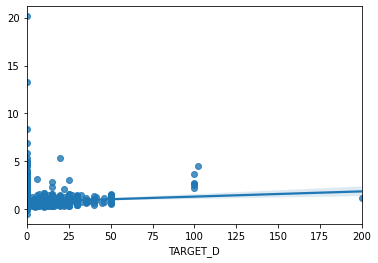

KNeighborsRegressor()
R2 score: -0.14195738390198742
MAE: 1.5030660797568516
MSE: 4.850705305704945 



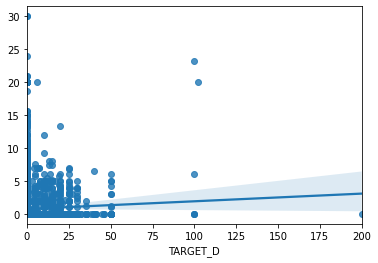

MLPRegressor()
R2 score: -8.320171020199298
MAE: 12.791817945198815
MSE: 13.85772322335814 



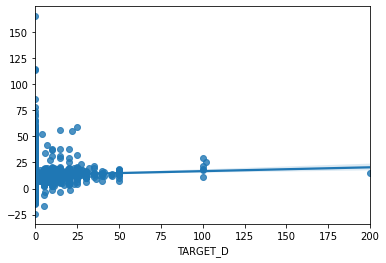

KeyboardInterrupt: 

In [19]:
model_selection(data, models)

In [20]:
df1 = data[data['TARGET_D'] < 100]
df2 = data[data['TARGET_D'] < 60]

In [21]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error as MSE
#scaler = StandardScaler()
#test_df = df4.loc[:,~df4.columns.duplicated()]

X = pd.get_dummies(df1.drop('TARGET_D', axis=1))

y = df1['TARGET_D']


X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

#scaler.fit(X_train)
#X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

dtrain = xgb.DMatrix(np.asmatrix(X_train_), label=y_train_)
dtest = xgb.DMatrix(np.asmatrix(X_test_), label=y_test_)

xgb_model2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model2.fit(np.asmatrix(X_train_), y_train_, early_stopping_rounds=5, 
             eval_set=[(np.asmatrix(X_test_), y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(np.asmatrix(X_train_))
y_pred2 = xgb_model2.predict(np.asmatrix(X_test_))

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  -227.7515391752016
Test r2 score:  -0.0007581574463335627
Train RMSE: 3.8491
Test RMSE: 3.8949
Train MAE: 1.3431
Test MAE: 1.3777


In [22]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error as MSE
#scaler = StandardScaler()
#test_df = df4.loc[:,~df4.columns.duplicated()]

X = pd.get_dummies(df2.drop('TARGET_D', axis=1))

y = df2['TARGET_D']


X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

#scaler.fit(X_train)
#X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

dtrain = xgb.DMatrix(np.asmatrix(X_train_), label=y_train_)
dtest = xgb.DMatrix(np.asmatrix(X_test_), label=y_test_)

xgb_model2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model2.fit(np.asmatrix(X_train_), y_train_, early_stopping_rounds=5, 
             eval_set=[(np.asmatrix(X_test_), y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(np.asmatrix(X_train_))
y_pred2 = xgb_model2.predict(np.asmatrix(X_test_))

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  -385.00741714098524
Test r2 score:  0.0004811207446631105
Train RMSE: 3.8078
Test RMSE: 3.7642
Train MAE: 1.3274
Test MAE: 1.3403


In [23]:
y = df1['TARGET_D']
X = pd.get_dummies(df1.drop(['TARGET_D'], axis=1))

LinearRegression()
R2 score: 0.003126584196523785
MAE: 1.4392850651095985
MSE: 3.875302175711151 



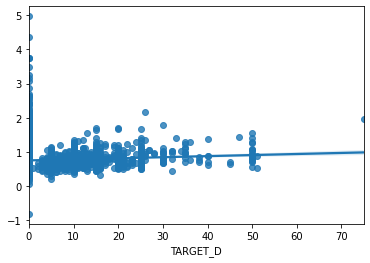

KNeighborsRegressor()
R2 score: -0.18108946707125861
MAE: 1.4231997693557688
MSE: 4.218198016433645 



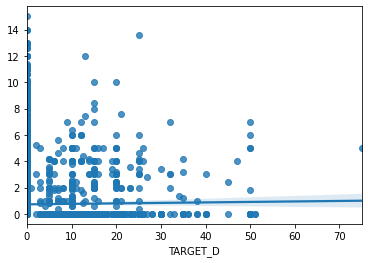

MLPRegressor()
R2 score: -4.8082626446273045
MAE: 8.147960719674364
MSE: 9.354243873348404 



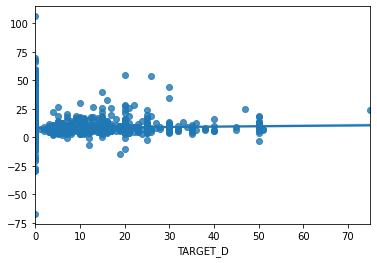

RandomForestRegressor()
R2 score: -0.06807614566989106
MAE: 1.7132901434537227
MSE: 4.011314124187498 



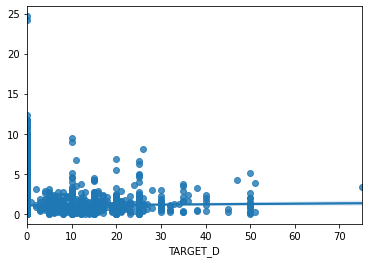

DecisionTreeRegressor()
R2 score: -1.4516607999263056
MAE: 1.7139723226922472
MSE: 6.077371101743618 



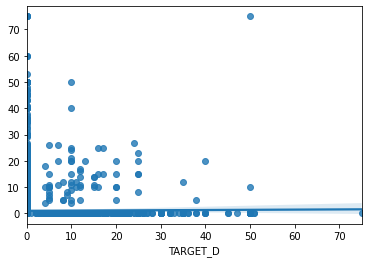

In [24]:
model_selection(data, models)

In [25]:
sum(data[data['TARGET_D']>150]['TARGET_D'])

800.0

In [26]:
len(data[data['TARGET_D']>150]['TARGET_D'])

4

In [41]:
data_rfe = data1[['TARGET_D','INCOME', 'POP90C1', 'POP90C2', 'POP90C3', 'ETH10', 'ETH16', 'DW3', 'HHD8', 'RHP3', 'RHP4', 'HUPA1',
 'MC1',  'MC2', 'TPE3', 'TPE4', 'TPE5', 'TPE6', 'ANC6', 'HC15', 'CARDPM12']]

LinearRegression()
R2 score: 0.003126584196523785
MAE: 1.4392850651095985
MSE: 3.875302175711151 



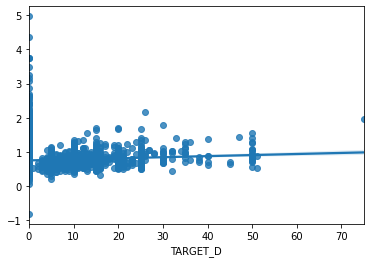

KNeighborsRegressor()
R2 score: -0.18108946707125861
MAE: 1.4231997693557688
MSE: 4.218198016433645 



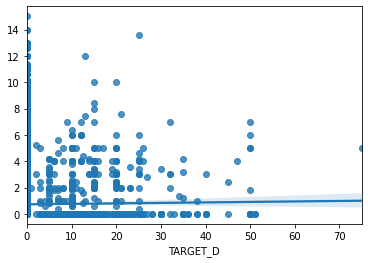

MLPRegressor()
R2 score: -2.515566670046346
MAE: 6.5718594490831075
MSE: 7.277517091813584 



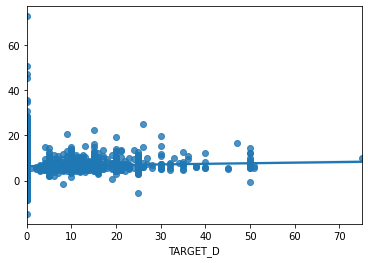

RandomForestRegressor()
R2 score: -0.06442555623046653
MAE: 1.7123543254529885
MSE: 4.004453098804578 



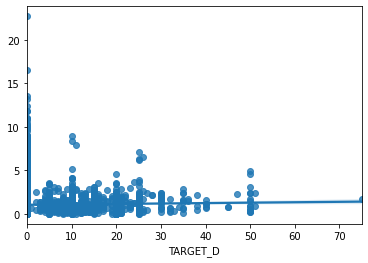

DecisionTreeRegressor()
R2 score: -1.483398331782377
MAE: 1.7410468102951195
MSE: 6.116581367127807 



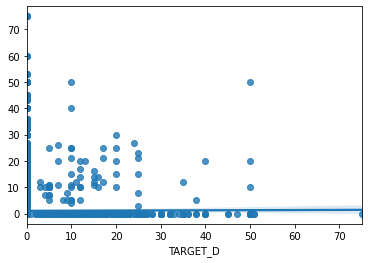

In [42]:
model_selection(data_rfe, models)

In [43]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error as MSE
#scaler = StandardScaler()
#test_df = df4.loc[:,~df4.columns.duplicated()]

X = pd.get_dummies(data_rfe.drop('TARGET_D', axis=1))

y = data_rfe['TARGET_D']


X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.25, random_state=42)

#scaler.fit(X_train)
#X_train_, X_test_ = (scaler.transform(X_train), scaler.transform(X_test))

dtrain = xgb.DMatrix(np.asmatrix(X_train_), label=y_train_)
dtest = xgb.DMatrix(np.asmatrix(X_test_), label=y_test_)

xgb_model2 = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model2.fit(np.asmatrix(X_train_), y_train_, early_stopping_rounds=5, 
             eval_set=[(np.asmatrix(X_test_), y_test_)], verbose=False)
y_train_pred2 = xgb_model2.predict(np.asmatrix(X_train_))
y_pred2 = xgb_model2.predict(np.asmatrix(X_test_))

print('Train r2 score: ', r2_score(y_train_pred2, y_train_))
print('Test r2 score: ', r2_score(y_test_, y_pred2))
train_mse2 = mean_squared_error(y_train_pred2, y_train_)
test_mse2 = mean_squared_error(y_pred2, y_test_)
train_rmse2 = np.sqrt(train_mse2)
test_rmse2 = np.sqrt(test_mse2)
train_mae = mean_absolute_error(y_train_pred2, y_train_)
test_mae = mean_absolute_error(y_pred2, y_test_)
print('Train RMSE: %.4f' % train_rmse2)
print('Test RMSE: %.4f' % test_rmse2)
print('Train MAE: %.4f' % train_mae)
print('Test MAE: %.4f' % test_mae)

Train r2 score:  -4059.583125806254
Test r2 score:  -0.00323068793147252
Train RMSE: 4.4366
Test RMSE: 4.3994
Train MAE: 1.2824
Test MAE: 1.2677
